# IMDB Data Harnessing : Unveiling Movie Insights

DEEPAK KUMAR -- AD-1234

CHANDAN KUMAR -- AD-1230

PRAVEEN KUMAR -- AD-1272

### Importing Major Required Libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [150]:
imdb_df = pd.read_csv("IMDB.csv")

imdb_df.head(2)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,tomatoURL
0,Code Name: K.O.Z.,2015,NOT RATED,13 Feb 2015,114 min,"Crime, Mystery",Celal Çimen,NaN,"Cem Kurtoglu, Hakan Ural, Hazim Körmükçü, Tolg...",A look at the 17-25 December 2013 corruption s...,...,1.6,"24,600",tt4458206,movie,NaN,NaN,NaN,NaN,True,NaN
1,Saving Christmas,2014,PG,14 Nov 2014,80 min,"Comedy, Family",Darren Doane,"Darren Doane, Cheston Hervey","Kirk Cameron, Darren Doane, Bridgette Cameron,...",Kirk is enjoying the annual Christmas party ex...,...,1.6,"12,686",tt4009460,movie,03 Nov 2015,"$2,778,297",IPD/Samuel Goldwyn Films,http://www.savingchristmas.com/,True,http://www.rottentomatoes.com/m/kirk_camerons_...


## Understanding the Dataset

In [151]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           5273 non-null   object 
 1   Year            5273 non-null   int64  
 2   Rated           4815 non-null   object 
 3   Released        5235 non-null   object 
 4   Runtime         5257 non-null   object 
 5   Genre           5271 non-null   object 
 6   Director        5272 non-null   object 
 7   Writer          5221 non-null   object 
 8   Actors          5266 non-null   object 
 9   Plot            5262 non-null   object 
 10  Language        5262 non-null   object 
 11  Country         5271 non-null   object 
 12  Awards          4462 non-null   object 
 13  Poster          5260 non-null   object 
 14  Ratings.Source  5273 non-null   object 
 15  Ratings.Value   5273 non-null   object 
 16  Metascore       3876 non-null   float64
 17  imdbRating      5273 non-null   f

In [152]:
B_rows = len(imdb_df)
B_columns = len(imdb_df.columns)
print("Number of rows and Bollywood Movie Dataset :")
print("Rows :" ,B_rows,"\nColumns :",B_columns)

Number of rows and Bollywood Movie Dataset :
Rows : 5273 
Columns : 27


# Data cleaning

Dropping unneccessary columns from the Dataset


In [153]:
to_drop = ["Rated","Ratings.Value","Released","Metascore","imdbID","Website","tomatoURL","Response","DVD","Plot","Poster","Ratings.Source","Type","BoxOffice","Production"]
imdb_df.drop(to_drop, axis=1, inplace=True)


Checking Information about Remaining Columns

In [154]:
rows = len(imdb_df)
columns = len(imdb_df.columns)
print("Number of rows and Bollywood Movie Dataset :")
print("Rows :" ,rows,"\nColumns :",columns)



Number of rows and Bollywood Movie Dataset :
Rows : 5273 
Columns : 12


In [155]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5273 entries, 0 to 5272
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       5273 non-null   object 
 1   Year        5273 non-null   int64  
 2   Runtime     5257 non-null   object 
 3   Genre       5271 non-null   object 
 4   Director    5272 non-null   object 
 5   Writer      5221 non-null   object 
 6   Actors      5266 non-null   object 
 7   Language    5262 non-null   object 
 8   Country     5271 non-null   object 
 9   Awards      4462 non-null   object 
 10  imdbRating  5273 non-null   float64
 11  imdbVotes   5273 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 494.5+ KB


Checking Null Values in Dataset

In [156]:
imdb_df.isna().sum()

Title           0
Year            0
Runtime        16
Genre           2
Director        1
Writer         52
Actors          7
Language       11
Country         2
Awards        811
imdbRating      0
imdbVotes       0
dtype: int64

Dealing with Null Values :

By Replacing the "Awards" Null values with '0'

By Dropping other Rows with Null values

In [157]:
# imdb_df = imdb_df['Awards'].fillna(0)
imdb_df['Awards'] = imdb_df['Awards'].fillna(0)
imdb_df.dropna(how="any" , inplace=True)

imdb_df.isna().sum()

Title         0
Year          0
Runtime       0
Genre         0
Director      0
Writer        0
Actors        0
Language      0
Country       0
Awards        0
imdbRating    0
imdbVotes     0
dtype: int64

Finding Duplicated Data in Dataset

In [158]:
print(f"""
Duplicated Data in Dataset : {imdb_df.duplicated().sum()}
""")


Duplicated Data in Dataset : 0



## Detecting Outliers in Dataset


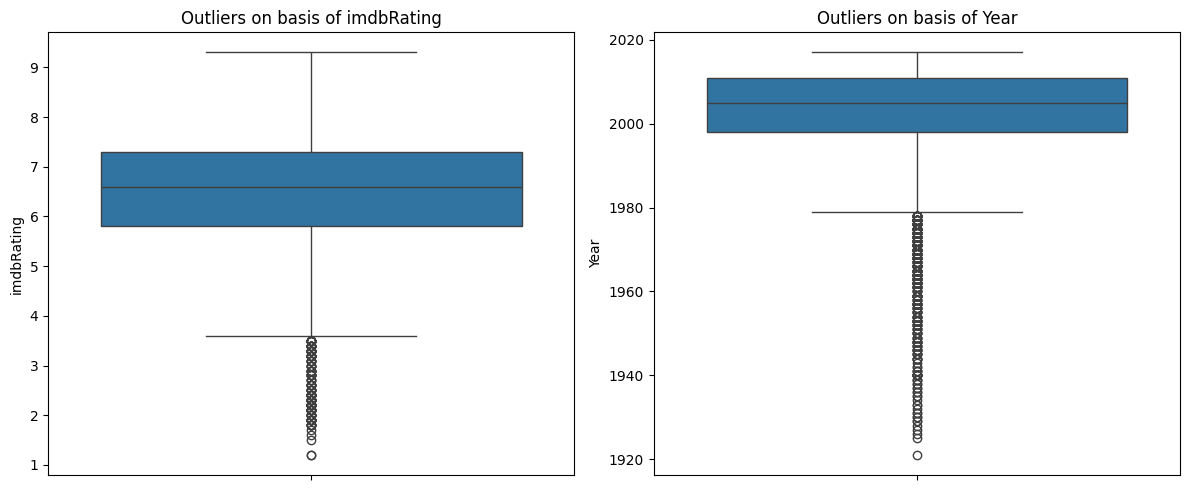

In [159]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for 'imdbRating'
sns.boxplot(data=imdb_df, y='imdbRating', ax=ax1)
ax1.set_title('Outliers on basis of imdbRating')

# Boxplot for 'Year'
sns.boxplot(data=imdb_df, y='Year', ax=ax2)
ax2.set_title('Outliers on basis of Year')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Note:
### Interquartile Range (IQR)

The interquartile range (IQR) is a measure of statistical dispersion, specifically the difference between the 75th and 25th percentiles of a dataset. It represents the middle 50% of the data, disregarding the extreme values (outliers). The IQR is less sensitive to outliers compared to other measures of dispersion, such as standard deviation, making it a more robust measure for skewed or heavy-tailed distributions.

IQR-based Outlier Detection

The IQR can be used to identify outliers in a dataset. Outliers are considered data points that lie outside the expected range of values. One common approach to detect outliers using the IQR is through the following formula:

Lower Bound = Q1 - 1.5 * IQR

Upper Bound = Q3 + 1.5 * IQR
Where:

Q1 is the 25th percentile (the quartile that divides the lower 25% of the data from the upper 75%)
Q3 is the 75th percentile (the quartile that divides the upper 75% of the data from the lower 25%)
IQR is the interquartile range (difference between Q3 and Q1)
Data points that fall outside the lower and upper bounds are considered outliers. This method is relatively simple and effective in identifying outliers, especially when the data distribution is reasonably symmetric.

In [160]:
# Define the IQR (Interquartile Range) threshold
iqr = imdb_df['Year'].quantile(0.75) - imdb_df['Year'].quantile(0.25)

Q1 = imdb_df['Year'].quantile(0.25)
Q3 = imdb_df['Year'].quantile(0.75)

# Identify outliers
lower_bound = Q1  - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

print("Lower Bound :",lower_bound,"\nUpper Bound :",upper_bound)

# Printing the outliers
outliers = imdb_df[(imdb_df['Year'] < lower_bound) | (imdb_df['Year'] > upper_bound)]
print()

# Total number of outliers
print(f"Total number of outliers : {len(outliers)}")

# updating the dataframe that has no outliers
imdb_df = imdb_df[(imdb_df["Year"] >= lower_bound) & (imdb_df["Year"] <= upper_bound)]

# Outliers after Updating the dataset
outliers = imdb_df[(imdb_df['Year'] < lower_bound) | (imdb_df['Year'] > upper_bound)]
print(f"Total number of outliers remaining : {len(outliers)}")

Lower Bound : 1978.5 
Upper Bound : 2030.5

Total number of outliers : 334
Total number of outliers remaining : 0


### Finding and Removing Lowerbound outliers on the basis of "imdbRating"


In [161]:
# Define the IQR (Interquartile Range) threshold
iqr = imdb_df['imdbRating'].quantile(0.75) - imdb_df['imdbRating'].quantile(0.25)

Q1 = imdb_df['imdbRating'].quantile(0.25)
Q3 = imdb_df['imdbRating'].quantile(0.75)

# Identify outliers
lower_bound = Q1  - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

lower_bound = 6 # manually entering lower bound to get movies having 6 or above ratings only
print("Lower Bound :",lower_bound,"\nUpper Bound :",upper_bound)

# Printing the outliers
outliers = imdb_df[(imdb_df['imdbRating'] < lower_bound)]
print()

# Total number of outliers
print(f"Total number of outliers : {len(outliers)}")

# updating the dataframe that has no outliers
imdb_df = imdb_df[(imdb_df["imdbRating"] >= lower_bound) ]

# Outliers after Updating the dataset
outliers = imdb_df[(imdb_df['imdbRating'] < lower_bound)]
print(f"Total number of outliers remaining : {len(outliers)}")

Lower Bound : 6 
Upper Bound : 9.3

Total number of outliers : 1452
Total number of outliers remaining : 0


## Cleaning the "Genre" column

Genre Column has many irregularities. One movie can have multiple Genre so we have to divide it in to primary and secondary Genre

In [162]:
# spliting the "Genre" in two part  "PrimaryGenre" and "SecondaryGenre"
imdb_df[['PrimaryGenre', 'SecondaryGenre']] = imdb_df['Genre'].str.split(', ', n=1, expand=True)
imdb_df.drop('SecondaryGenre', axis=1, inplace=True)

imdb_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3404 entries, 63 to 5271
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         3404 non-null   object 
 1   Year          3404 non-null   int64  
 2   Runtime       3404 non-null   object 
 3   Genre         3404 non-null   object 
 4   Director      3404 non-null   object 
 5   Writer        3404 non-null   object 
 6   Actors        3404 non-null   object 
 7   Language      3404 non-null   object 
 8   Country       3404 non-null   object 
 9   Awards        3404 non-null   object 
 10  imdbRating    3404 non-null   float64
 11  imdbVotes     3404 non-null   object 
 12  PrimaryGenre  3404 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 372.3+ KB


In [163]:
# Set a threshold for the minimum number of movies per genre
min_movies_threshold = 50
min_movies_threshold_secondary = min_movies_threshold


# Count the frequency of each genre
genre_counts = imdb_df['PrimaryGenre'].value_counts()


# Identify genres with counts below the threshold
other_genres = genre_counts[genre_counts < min_movies_threshold].index

# Label the genres with counts below the threshold as 'Other'
imdb_df['PrimaryGenre'] = imdb_df['PrimaryGenre'].replace(other_genres, 'Other')

imdb_df["PrimaryGenre"].unique()

array(['Adventure', 'Crime', 'Action', 'Biography', 'Drama', 'Comedy',
       'Animation', 'Other', 'Horror', 'Documentary'], dtype=object)

## Cleaning the "Awards" column
In this case, we have awards and nomination in same column "Awards" so we have to seperate it

In [164]:
imdb_df.Awards

63                                         2 nominations.
100     Nominated for 7 Oscars. Another 19 wins & 30 n...
103     Won 2 Oscars. Another 151 wins & 153 nominations.
105       Won 7 Oscars. Another 71 wins & 33 nominations.
106     Won 11 Oscars. Another 197 wins & 122 nominati...
                              ...                        
5266                               4 wins & 1 nomination.
5267                                                    0
5269                                        1 nomination.
5270                               3 wins & 1 nomination.
5271                                                    0
Name: Awards, Length: 3404, dtype: object

In [165]:
# Extract information using regular expressions
imdb_df['TotalNominations'] = imdb_df['Awards'].str.extract(r'(\d+) nominations', expand=False).fillna(0).astype(int) + \
                              imdb_df['Awards'].str.extract(r'Nominated for (\d+) Oscar', expand=False).fillna(0).astype(int)
imdb_df['TotalAwards'] = imdb_df['Awards'].str.extract(r'Won (\d+) Oscar', expand=False).fillna(0).astype(int) + \
                         imdb_df['Awards'].str.extract(r'(\d+) wins', expand=False).fillna(0).astype(int)

# Drop intermediate columns if needed
# imdb_df = imdb_df.drop(['OscarWins', 'OtherWins'], axis=1)

print(imdb_df["TotalAwards"].info())

<class 'pandas.core.series.Series'>
Index: 3404 entries, 63 to 5271
Series name: TotalAwards
Non-Null Count  Dtype
--------------  -----
3404 non-null   int32
dtypes: int32(1)
memory usage: 39.9 KB
None


In [166]:
print(imdb_df["TotalNominations"].describe())

count    3404.000000
mean       16.893655
std        29.573556
min         0.000000
25%         2.000000
50%         6.000000
75%        18.000000
max       326.000000
Name: TotalNominations, dtype: float64


### Cleaning the column "Director"


In [167]:
# Create a new column 'PrimaryDirector' with only the primary director for each movie
imdb_df['PrimaryDirector'] = imdb_df['Director'].apply(lambda x: x.split(', ')[0] if isinstance(x, str) else x)
imdb_df["Director"] = imdb_df["PrimaryDirector"]
imdb_df.drop("PrimaryDirector", axis=1,inplace=True)

## Cleaning the column "Runtime"
Currently it is an object datatype conveting it to integer 

In [168]:
imdb_df['Runtime'] = imdb_df['Runtime'].str.replace(' min', '').astype(int)

In [169]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3404 entries, 63 to 5271
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3404 non-null   object 
 1   Year              3404 non-null   int64  
 2   Runtime           3404 non-null   int32  
 3   Genre             3404 non-null   object 
 4   Director          3404 non-null   object 
 5   Writer            3404 non-null   object 
 6   Actors            3404 non-null   object 
 7   Language          3404 non-null   object 
 8   Country           3404 non-null   object 
 9   Awards            3404 non-null   object 
 10  imdbRating        3404 non-null   float64
 11  imdbVotes         3404 non-null   object 
 12  PrimaryGenre      3404 non-null   object 
 13  TotalNominations  3404 non-null   int32  
 14  TotalAwards       3404 non-null   int32  
dtypes: float64(1), int32(3), int64(1), object(10)
memory usage: 385.6+ KB


In [170]:
imdb_df.shape

(3404, 15)

## Statistical Analysis

Describing the numerical columns of the dataframe.


In [171]:
imdb_df.describe()

,Year,Runtime,imdbRating,TotalNominations,TotalAwards
count,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000
mean,2004.316686,113.457991,6.995682,16.893655,8.932726
std,8.358459,23.505753,0.649566,29.573556,19.501634
min,1979.000000,7.000000,6.000000,0.000000,0.000000
25%,1999.000000,97.000000,6.500000,2.000000,0.000000
50%,2006.000000,109.000000,6.900000,6.000000,3.000000
75%,2011.000000,125.000000,7.400000,18.000000,9.000000
max,2017.000000,325.000000,9.300000,326.000000,239.000000


The above analysis depicts the minimum, maximum, and mean values of the Year and ImdbRating.

Number of Unique Records in Dataset

In [172]:
imdb_df.nunique()

Title               3399
Year                  39
Runtime              149
Genre                374
Director            1715
Writer              3127
Actors              3375
Language             606
Country              466
Awards              1354
imdbRating            32
imdbVotes           3346
PrimaryGenre          10
TotalNominations     160
TotalAwards          123
dtype: int64

Description of object type columns of dataframe.

In [173]:
for i in imdb_df.columns:
    if imdb_df[i].dtype==object:
        print(imdb_df[i].describe())
        print()

count                3404
unique               3399
top       Out of the Blue
freq                    2
Name: Title, dtype: object

count      3404
unique      374
top       Drama
freq        189
Name: Genre, dtype: object

count                 3404
unique                1715
top       Steven Spielberg
freq                    23
Name: Director, dtype: object

count            3404
unique           3127
top       Woody Allen
freq               16
Name: Writer, dtype: object

count                                                  3404
unique                                                 3375
top       William Shatner, Leonard Nimoy, DeForest Kelle...
freq                                                      5
Name: Actors, dtype: object

count        3404
unique        606
top       English
freq         1851
Name: Language, dtype: object

count     3404
unique     466
top        USA
freq      1767
Name: Country, dtype: object

count     3404
unique    1354
top          0
freq       27

## Data Wrangling

In [174]:
print(imdb_df['PrimaryGenre'].value_counts())


PrimaryGenre
Comedy         822
Drama          733
Action         712
Crime          289
Biography      235
Adventure      207
Animation      175
Horror          87
Other           82
Documentary     62
Name: count, dtype: int64


In [175]:
print(imdb_df['Director'].value_counts())


Director
Steven Spielberg      23
Clint Eastwood        18
Woody Allen           18
Martin Scorsese       15
Ridley Scott          14
                      ..
Lance Hool             1
Christian Volckman     1
Cory Edwards           1
Xavier Gens            1
Benjamin Roberds       1
Name: count, Length: 1715, dtype: int64


1. Identify the movie with the highest IMDb rating for each genre

In [176]:
# Find the movie with the highest IMDb rating for each genre

# Group by 'PrimaryGenre' and find the row with the maximum 'imdbRating' in each group
grouped_by_genre = imdb_df.groupby('PrimaryGenre')
max_rating_indices = grouped_by_genre['imdbRating'].idxmax()

# Use the indices to extract the corresponding rows
most_acclaimed_movies_by_genre = imdb_df.loc[max_rating_indices].reset_index(drop=True)

# Display the result
print("Movie with the highest IMDb rating for each Genre :")
print(most_acclaimed_movies_by_genre[['PrimaryGenre', 'Title', 'imdbRating']])

Movie with the highest IMDb rating for each Genre :
  PrimaryGenre                                          Title  imdbRating
0       Action                                The Dark Knight         9.0
1    Adventure  The Lord of the Rings: The Return of the King         8.9
2    Animation                                  Spirited Away         8.6
3    Biography                               Schindler's List         8.9
4       Comedy                                   Forrest Gump         8.8
5        Crime                       The Shawshank Redemption         9.3
6  Documentary                           The Other Dream Team         8.4
7        Drama                                     Fight Club         8.8
8       Horror                                          Alien         8.5
9        Other                                        Memento         8.5


2. Determine the most prolific directors in terms of the number of movies directed:

In [177]:
# Count the number of movies directed by each director
director_movie_count = imdb_df.groupby('Director')['Title'].count()
most_prolific_directors = director_movie_count.nlargest(5)
most_prolific_directors

Director
Steven Spielberg    23
Clint Eastwood      18
Woody Allen         18
Martin Scorsese     15
Ridley Scott        14
Name: Title, dtype: int64

3. Identify the Most successfull Year for moives

In [178]:
# Step 1: Define the IMDb rating threshold for top-rated movies
top_rated_threshold = 8.0  # Adjust this threshold as needed

# Step 2: Filter the dataset to include only top-rated movies
top_rated_movies = imdb_df[imdb_df['imdbRating'] >= top_rated_threshold]

# Step 3: Group by release year and count the number of movies in each year
top_rated_counts_by_year = top_rated_movies.groupby('Year')['Title'].count().reset_index()

# Step 4: Identify the year with the maximum count
best_year = top_rated_counts_by_year.loc[top_rated_counts_by_year['Title'].idxmax()]

# Display the results
print(f"The best year for top-rated movies is {best_year['Year']} with {best_year['Title']} movies with IMDB rating >= {top_rated_threshold}")

The best year for top-rated movies is 2014 with 21 movies with IMDB rating >= 8.0


4. Director with most popular films Back to Back

In [179]:
# Group by director and calculate the average IMDb rating and the count of movies
director_stats = imdb_df.groupby('Director').agg({'imdbRating': 'mean', 'Title': 'count'}).reset_index()

# Filter out directors with fewer than a certain number of movies (optional)
min_movies_threshold = 5
director_stats = director_stats[director_stats['Title'] >= min_movies_threshold]

# Find the director with the highest average IMDb rating
most_popular_director = director_stats.loc[director_stats['imdbRating'].idxmax()]

# Display the results
print(f"The director with the most popular films (based on average IMDb rating) is {most_popular_director['Director']} "
      f"with an average rating of {most_popular_director['imdbRating']:.2f}.")


The director with the most popular films (based on average IMDb rating) is Christopher Nolan with an average rating of 8.43.


5. What are the top 5 movies with the highest IMDb ratings?

In [180]:
top_movies = imdb_df.nlargest(5, 'imdbRating')
top_movies


,Title,Year,Runtime,Genre,Director,Writer,Actors,Language,Country,Awards,imdbRating,imdbVotes,PrimaryGenre,TotalNominations,TotalAwards
100,The Shawshank Redemption,1994,142,"Crime, Drama",Frank Darabont,"Stephen King (short story """"Rita Hayworth and ...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,9.3,"1,825,626",Crime,37,19
103,The Dark Knight,2008,152,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...","English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,9.0,"1,802,351",Action,153,153
105,Schindler's List,1993,195,"Biography, Drama, History",Steven Spielberg,"Thomas Keneally (book), Steven Zaillian (scree...","Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...","English, Hebrew, German, Polish",USA,Won 7 Oscars. Another 71 wins & 33 nominations.,8.9,"937,837",Biography,33,78
106,The Lord of the Rings: The Return of the King,2003,201,"Adventure, Drama, Fantasy",Peter Jackson,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...","Noel Appleby, Ali Astin, Sean Astin, David Aston","English, Quenya, Old English, Sindarin","USA, New Zealand",Won 11 Oscars. Another 197 wins & 122 nominati...,8.9,"1,304,569",Adventure,122,208
107,Pulp Fiction,1994,154,"Crime, Drama",Quentin Tarantino,"Quentin Tarantino (stories), Roger Avary (stor...","Tim Roth, Amanda Plummer, Laura Lovelace, John...","English, Spanish, French",USA,Won 1 Oscar. Another 60 wins & 68 nominations.,8.9,"1,427,451",Crime,68,61


# **Data Visualization**

## IMDB Rating Trends

### Q1. Plotting for IMDB rating with respect to Average Awards

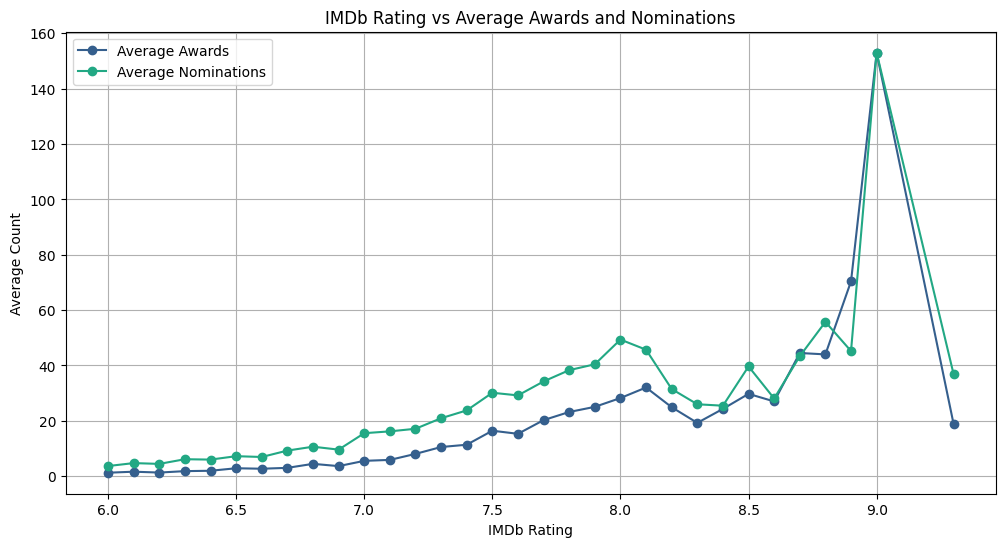

In [181]:
# Group by IMDb rating and calculate the average awards and nominations
average_ratings = imdb_df.groupby('imdbRating').agg({'TotalAwards': 'mean', 'TotalNominations': 'mean'}).reset_index()

# Plotting IMDb rating vs Average Awards and Nominations as a line graph
plt.figure(figsize=(12, 6))

# Line plot for IMDb rating vs Average Awards with the 'viridis' colormap
plt.plot(average_ratings['imdbRating'], average_ratings['TotalAwards'], marker='o', label='Average Awards', color=sns.color_palette("viridis", as_cmap=True)(0.3))

# Line plot for IMDb rating vs Average Nominations with the 'viridis' colormap
plt.plot(average_ratings['imdbRating'], average_ratings['TotalNominations'], marker='o', label='Average Nominations', color=sns.color_palette("viridis", as_cmap=True)(0.6))

plt.title('IMDb Rating vs Average Awards and Nominations')
plt.xlabel('IMDb Rating')
plt.ylabel('Average Count')
plt.legend()
plt.grid(True)
plt.show()


#### Q2. Plotting Number of Movies with respect to IMDb Rating

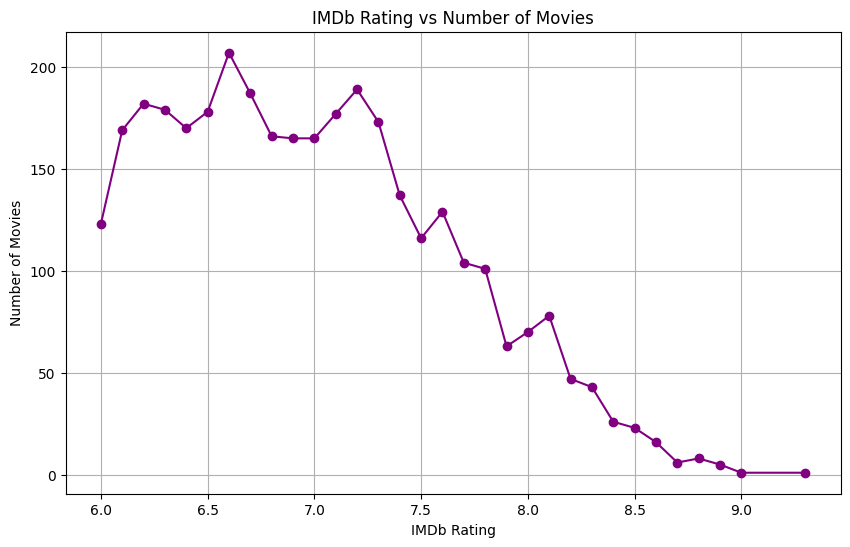

In [182]:
# Plotting the number of movies vs IMDb rating as a line graph
plt.figure(figsize=(10, 6))

# Count the number of movies for each IMDb rating
movie_counts = imdb_df['imdbRating'].value_counts().sort_index()

# Line plot for Number of movies vs IMDb rating
plt.plot(movie_counts.index, movie_counts.values, marker='o', color='purple')
plt.title('IMDb Rating vs Number of Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')

plt.grid(True)
plt.show()


# Runtime Trends

### Q3. Temporal Trends of Average Runtime of Runtime

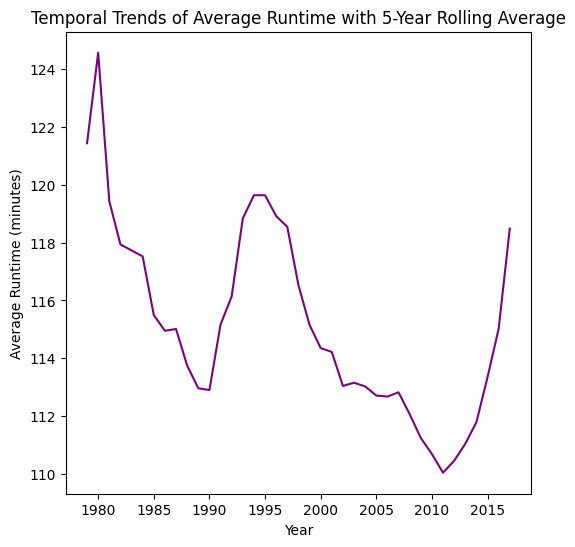

In [183]:
# Group by year and calculate the average runtime
average_runtime_by_year = imdb_df.groupby('Year')['Runtime'].mean().reset_index()

# Apply a rolling average with a window size of your choice (e.g., 5 years)
rolling_avg_window = 5
average_runtime_by_year['Rolling_Avg_Runtime'] = average_runtime_by_year['Runtime'].rolling(window=rolling_avg_window, min_periods=1).mean()

# Plotting the temporal trends of average runtime with rolling average
plt.figure(figsize=(6, 6))
sns.lineplot(x='Year', y='Rolling_Avg_Runtime', data=average_runtime_by_year, err_style=None, color='purple')
plt.title(f'Temporal Trends of Average Runtime with {rolling_avg_window}-Year Rolling Average')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.show()


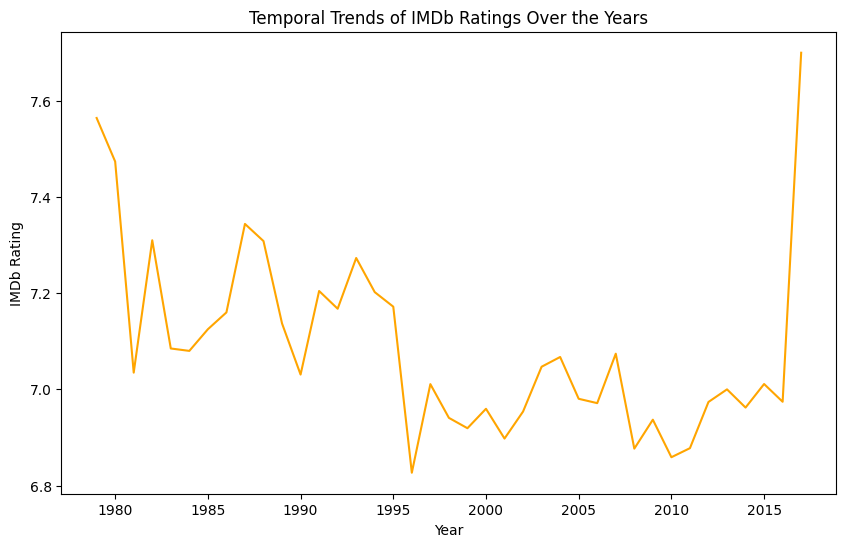

In [184]:
# Plotting temporal trends of IMDb ratings over the years

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='imdbRating', data=imdb_df, err_style=None, color='orange')
plt.title('Temporal Trends of IMDb Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.show()


Average runtime of movies

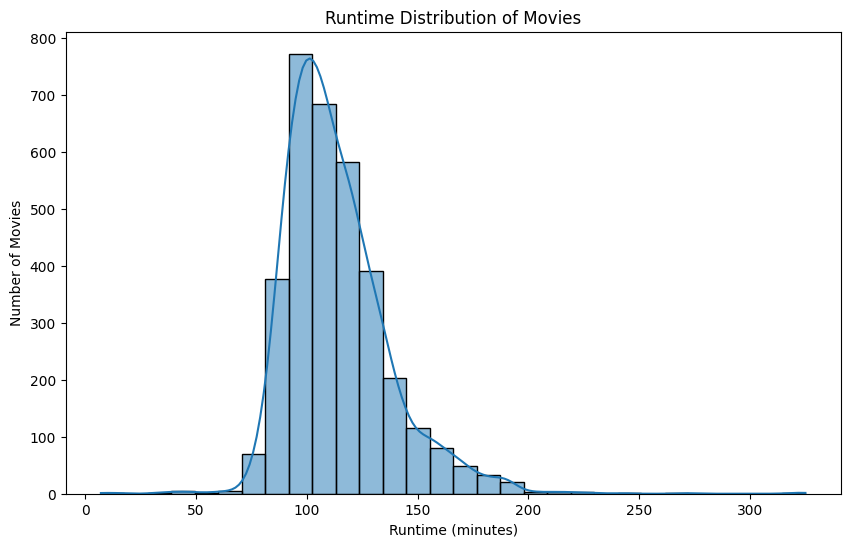

In [185]:
# Plotting the distribution of movie runtimes with the 'viridis' color palette
plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['Runtime'], bins=30, kde=True)
plt.title('Runtime Distribution of Movies')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()


## Genre Trends

### Q4. What is the co-relation between IMDB rating and Genre

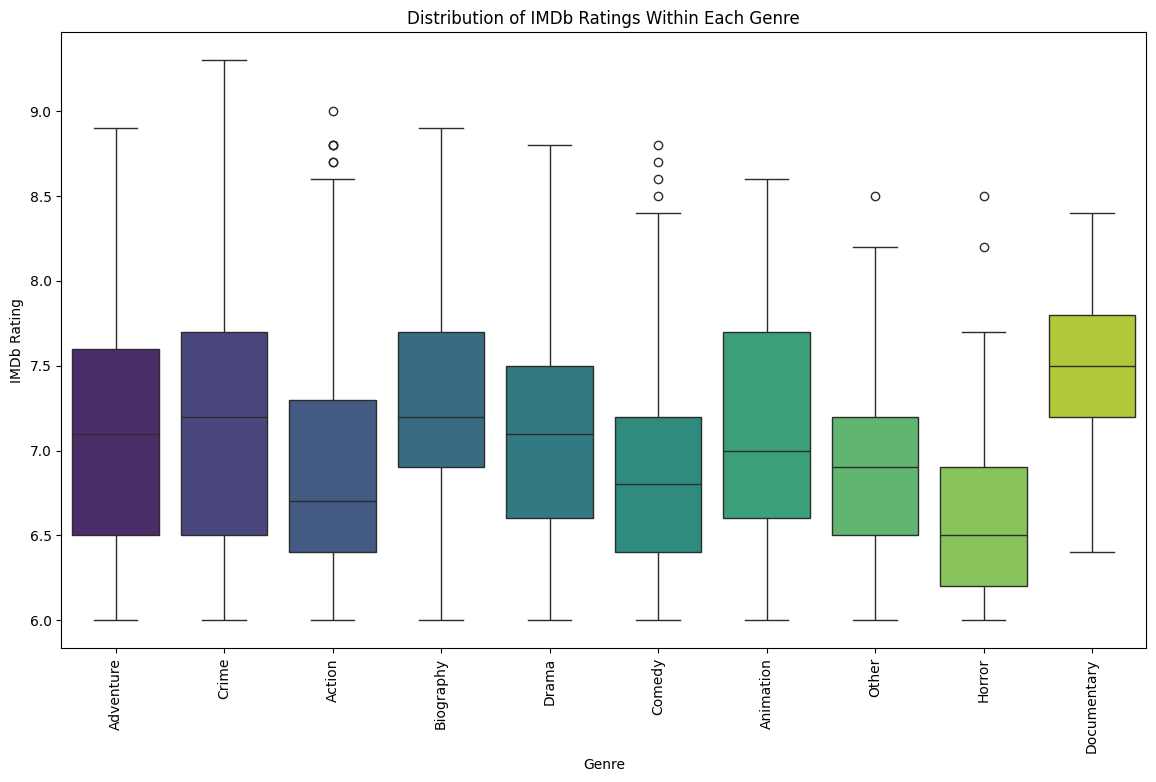

In [186]:
#IMDB rating vs Primary Genre
# Create a box plot for IMDb ratings within each genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='PrimaryGenre', y='imdbRating', data=imdb_df, palette='viridis', hue ="PrimaryGenre", dodge=False)
plt.title('Distribution of IMDb Ratings Within Each Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=90)
plt.show()



### Q5. Distribution of Movies by Genre

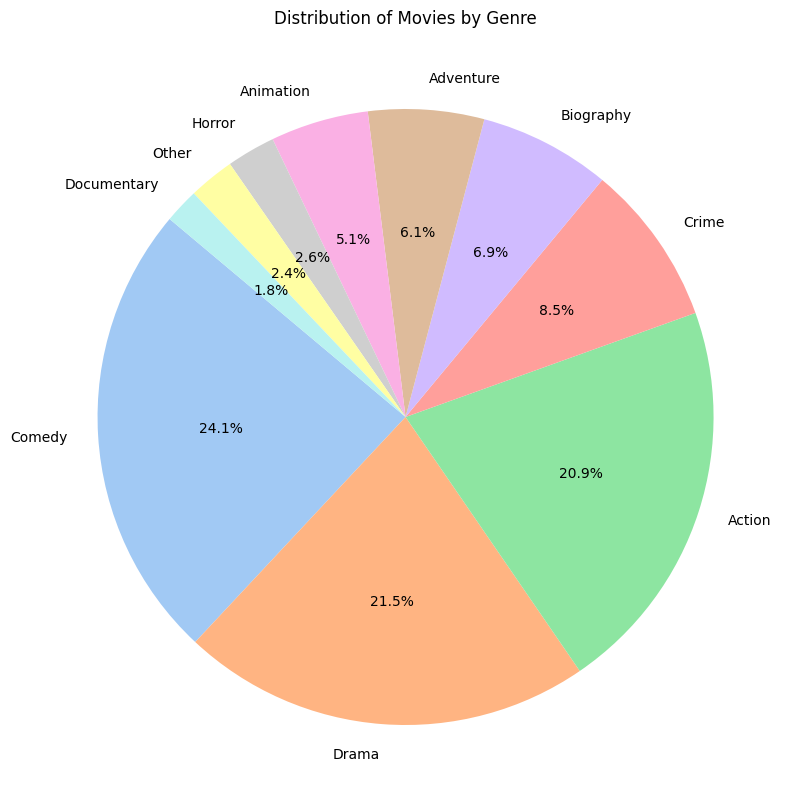

In [187]:
# Count the frequency of each genre
genre_counts = imdb_df['PrimaryGenre'].value_counts()

# Set a custom color palette using seaborn
colors = sns.color_palette('pastel')

# Plotting a pie chart with custom colors
plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Movies by Genre')
plt.show()